## Aim

Process the gender and race coded data. 

Later, codes here became part of `get_authorid_with_vars.py`

In [178]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [179]:
# names = ['haley', 'jongmin', 'jaemin', 'jeff', 'matthew', 'michelle']
names = ['haley', 'jaemin', 'matthew', 'michelle']
data_dir = '../../data/interim/gender_race_result'

In [180]:
haley = pd.read_csv(f'{data_dir}/haley.csv')
haley['Coder'] = 'Haley'
matthew = pd.read_csv(f'{data_dir}/matthew.csv')
matthew['Coder'] = 'Matthew'
michelle = pd.read_csv(f'{data_dir}/michelle.csv')
michelle['Coder'] = 'Michelle'
# jeff = pd.read_csv(f'{data_dir}/jeff.csv')
# jongmin = pd.read_csv(f'{data_dir}/jongmin.csv')
jaemin = pd.read_csv(f'{data_dir}/jaemin.csv')
jaemin['Coder'] = 'Jaemin'
jaemin['gender_prediction'] = jaemin['gender_prediction'].str.replace(' M', 'M')

In [181]:
set(jaemin.gender_prediction)

{'F', 'M', 'N'}

## Deal with Haley and Michelle data

### Gender

In [182]:
# for haley: if genderpred_api is nan, use gender_prediction, otherwise, use genderize result
haley_genderpred = np.where(
    haley.genderpred_api.isnull(), haley["gender_prediction"], haley.genderize)
haley_genderpred[haley_genderpred == 'female'] = 'F'
haley_genderpred[haley_genderpred == 'male'] = 'M'
set(haley_genderpred)

{'F', 'M', 'N', nan}

In [183]:
# for michelle: if genderpred_api is nan, use gender_prediction, otherwise, use genderize result
michelle_genderpred = np.where(
    michelle.genderpred_api.isnull(), michelle["gender_prediction"], michelle.genderize)
michelle_genderpred[michelle_genderpred == 'female'] = 'F'
michelle_genderpred[michelle_genderpred == 'male'] = 'M'
set(michelle_genderpred)

{'F', 'M', 'N', nan}

In [184]:
# there are two nans because haley said to rely on genderize which provides nan
np.argwhere(haley_genderpred!=haley_genderpred)

array([[1594],
       [1657]])

In [185]:
# haley.iloc[1657, :]

In [186]:
# there are two nans because michelle said to rely on genderize which provides nan
np.argwhere(michelle_genderpred!=michelle_genderpred)

array([[1586],
       [1606]])

In [187]:
# michelle.iloc[1606, :]

### Race

In [188]:
set(haley.race)

{'api', 'black', 'hispanic', 'white'}

In [189]:
# for haley: if genderpred_api is nan, use gender_prediction, otherwise, use genderize result
haley_racepred = np.where(
    haley.racepred_api.isnull(), haley["race_prediction"], haley.race)
haley_racepred[haley_racepred == 'api'] = 2
haley_racepred[haley_racepred == 'hispanic'] = 3
haley_racepred[haley_racepred == 'white'] = 0
set(haley_racepred)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

In [190]:
# for michelle: if genderpred_api is nan, use gender_prediction, otherwise, use genderize result
michelle_racepred = np.where(
    michelle.racepred_api.isnull(), michelle["race_prediction"], michelle.race)
michelle_racepred[michelle_racepred == 'api'] = 2
michelle_racepred[michelle_racepred == 'hispanic'] = 3
michelle_racepred[michelle_racepred == 'white'] = 0
set(michelle_racepred)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

### Update data

In [191]:
haley['gender_prediction'] = haley_genderpred
michelle['gender_prediction'] = michelle_genderpred
haley['race_prediction'] = haley_racepred
michelle['race_prediction'] = michelle_racepred

## Matthew

In [192]:
Counter(matthew.gender_prediction)

Counter({'M': 65, 'F': 42, 'f': 661, 'm': 1112, 'n': 1, nan: 3})

In [193]:
set(matthew.race_prediction)

{0, 1, 2, 3, 4, 5}

## Jaemin

In [194]:
Counter(matthew.gender_prediction)

Counter({'M': 65, 'F': 42, 'f': 661, 'm': 1112, 'n': 1, nan: 3})

In [195]:
set(matthew.race_prediction)

{0, 1, 2, 3, 4, 5}

## Organize data

In [196]:
haley = haley[['Coder', 'firstName', 'genderize', 'authorID', 'doi', 'gender_prediction', 'race_prediction']]
set(haley.gender_prediction), set(haley.race_prediction)

({'F', 'M', 'N', nan}, {0.0, 1.0, 2.0, 3.0, 4.0, 5.0})

In [197]:
matthew = matthew[['Coder', 'firstName', 'genderize', 'authorID', 'doi', 'gender_prediction', 'race_prediction']]
set(matthew.gender_prediction), set(matthew.race_prediction)

({'F', 'M', 'f', 'm', 'n', nan}, {0, 1, 2, 3, 4, 5})

In [198]:
michelle = michelle[['Coder', 'firstName', 'genderize', 'authorID', 'doi', 'gender_prediction', 'race_prediction']]
set(michelle.gender_prediction), set(michelle.race_prediction)

({'F', 'M', 'N', nan}, {0.0, 1.0, 2.0, 3.0, 4.0, 5.0})

In [199]:
jaemin = jaemin[['Coder', 'firstName', 'genderize', 'authorID', 'doi', 'gender_prediction', 'race_prediction']]
set(jaemin.gender_prediction), set(jaemin.race_prediction)

({'F', 'M', 'N'}, {0, 1, 2, 3, 4, 5})

In [200]:
df = pd.concat([haley, michelle, matthew, jaemin], ignore_index = True)
df['gender_prediction'] = np.where(
    df.gender_prediction.isnull(), df.gender_prediction, df.gender_prediction.str.upper())
df.sample(10)

,Coder,firstName,genderize,authorID,doi,gender_prediction,race_prediction
5627,Matthew,Marvin,male,10.1111/j.1460-2466.1957.tb00249.x+1.0,10.1111/j.1460-2466.1957.tb00249.x,M,0
491,Haley,Nancy,female,10.1111/j.1753-9137.2012.01145.x+1.0,10.1111/j.1753-9137.2012.01145.x,F,0.0
3632,Michelle,Thomas,male,10.1111/j.1460-2466.1976.tb01395.x+1.0,10.1111/j.1460-2466.1976.tb01395.x,M,0.0
2983,Michelle,Judee,female,10.1111/j.1460-2466.2002.tb02567.x+1.0,10.1111/j.1460-2466.2002.tb02567.x,F,0.0
6329,Jaemin,Howard,male,10.1111/j.1083-6101.2011.01541.x+3.0,10.1111/j.1083-6101.2011.01541.x,M,0
4795,Matthew,Ronald,male,10.1111/j.1460-2466.2004.tb02615.x+2.0,10.1111/j.1460-2466.2004.tb02615.x,M,1
2583,Michelle,Sue,female,10.1111/j.1468-2885.2010.01357.x+1.0,10.1111/j.1468-2885.2010.01357.x,F,0.0
7427,Jaemin,Richard,male,10.1111/j.1460-2466.1975.tb00580.x+2.0,10.1111/j.1460-2466.1975.tb00580.x,M,0
2102,Michelle,Andy,male,10.1093/hcr/hqy004+3.0,10.1093/hcr/hqy004,M,2.0
3827,Matthew,Robert,male,10.1093/ct/qtab002+1.0,10.1093/ct/qtab002,M,0


In [201]:
# These are the nans without considering initial_df

first_try_nan = df[df.gender_prediction.isnull()]
first_try_nan

,Coder,firstName,genderize,authorID,doi,gender_prediction,race_prediction
1594,Haley,L.S.,NaN,10.1111/j.1468-2958.1980.tb00547.x+1.0,10.1111/j.1468-2958.1980.tb00547.x,NaN,0
1657,Haley,S.,NaN,10.1111/j.1460-2466.1978.tb01582.x+2.0,10.1111/j.1460-2466.1978.tb01582.x,NaN,0
3470,Michelle,R.,NaN,10.1111/j.1468-2958.1981.tb00655.x+3.0,10.1111/j.1468-2958.1981.tb00655.x,NaN,0
3490,Michelle,F.,NaN,10.1111/j.1460-2466.1980.tb01988.x+1.0,10.1111/j.1460-2466.1980.tb01988.x,NaN,3
5631,Matthew,T.,NaN,10.1111/j.1460-2466.1955.tb01117.x+1.0,10.1111/j.1460-2466.1955.tb01117.x,NaN,0
5647,Matthew,K.,NaN,10.1111/j.1460-2466.1951.tb00113.x+1.0,10.1111/j.1460-2466.1951.tb00113.x,NaN,0
5649,Matthew,L.,NaN,10.1111/j.1460-2466.1951.tb00105.x+2.0,10.1111/j.1460-2466.1951.tb00105.x,NaN,0


## Initial df result

In [202]:
initial_df = pd.read_csv(f'{data_dir}/initial_df.csv')
initial_df[initial_df.authorID.isin(first_try_nan.authorID)]

,Coder,authorID,doi,url,year,title,journal,numberOfAuthors,authorPosition,authorFullName,firstName,lastName,affiliation,gscholarLink,googleSearch,genderize,genderize_prob,genderize_basedon,genderAccuracy,authorFullName.1,firstName.1,lastName.1,affiliation.1,gscholarLink.1,googleSearch.1,race,racePredAccuracy,api,black,hispanic,white,raceHighest,raceSecondHighest,raceDiff,affProcessed,affiliation.2,ROR_AFFNAME,matchMethod,ROR_ID,type,firstNameLength,gender_prediction,Unnamed: 42
31,michelle,10.1111/j.1460-2466.1980.tb01988.x+1.0,10.1111/j.1460-2466.1980.tb01988.x,https://academic.oup.com/joc/article/30/3/30/4371874,1980,How Accurate Are the Headlines?,Journal of Communication,1,1,F. T. Marquez,F.,Marquez,"1 Department of Journalism, Temple University",https://scholar.google.com/scholar?hl=en&as_sdt=0%252C50&q=F.+Marquez,https://www.google.com/search?q=F.+T.+Marquez+department+of+journalism+temple+university,NaN,0.0,0,Low,F. T. Marquez,F.,Marquez,"1 Department of Journalism, Temple University",https://scholar.google.com/scholar?hl=en&as_sdt=0%252C50&q=F.+Marquez,https://www.google.com/search?q=F.+T.+Marquez+department+of+journalism+temple+university,hispanic,High,0.014117,0.005295,0.912621,0.067967,0.912621,0.067967,0.844655,department of journalism temple university,"1 Department of Journalism, Temple University",Temple University,Exact,https://ror.org/00kx1jb78,R,2,M,NaN
41,matthew,10.1111/j.1460-2466.1951.tb00113.x+1.0,10.1111/j.1460-2466.1951.tb00113.x,https://academic.oup.com/joc/article/1/2/30/4070464,1951,Wanted: Skilled Communicators in the Air Force,Journal of Communication,1,1,K. B. Clark,K.,Clark,"1 Captain United States Air Force R.O.T.C., University of Washington, Seattle, Washington",https://scholar.google.com/scholar?hl=en&as_sdt=0%252C50&q=K.+Clark,https://www.google.com/search?q=K.+B.+Clark+captain+united+states+air+force+r+o+t+c+university+of+washington+seattle+washington,NaN,0.0,0,Low,K. B. Clark,K.,Clark,"1 Captain United States Air Force R.O.T.C., University of Washington, Seattle, Washington",https://scholar.google.com/scholar?hl=en&as_sdt=0%252C50&q=K.+Clark,https://www.google.com/search?q=K.+B.+Clark+captain+united+states+air+force+r+o+t+c+university+of+washington+seattle+washington,white,Low,0.004662,0.188199,0.024371,0.782768,0.782768,0.188199,0.594569,captain united states air force r o t c university of washington seattle washington,"1 Captain United States Air Force R.O.T.C., University of Washington, Seattle, Washington",University of Washington,Exact,https://ror.org/00cvxb145,R,2,M,NaN
55,matthew,10.1111/j.1460-2466.1951.tb00105.x+2.0,10.1111/j.1460-2466.1951.tb00105.x,https://academic.oup.com/joc/article/1/1/66/4609486,1951,University Courses on Television,Journal of Communication,2,2,L. P. Greenhill,L.,Greenhill,2 Research Associate and Coordinator of the Instructional Film Program,https://scholar.google.com/scholar?hl=en&as_sdt=0%252C50&q=L.+Greenhill,https://www.google.com/search?q=L.+P.+Greenhill+research+associate+and+coordinator+of+the+instructional+film+program,NaN,0.0,0,Low,L. P. Greenhill,L.,Greenhill,2 Research Associate and Coordinator of the Instructional Film Program,https://scholar.google.com/scholar?hl=en&as_sdt=0%252C50&q=L.+Greenhill,https://www.google.com/search?q=L.+P.+Greenhill+research+associate+and+coordinator+of+the+instructional+film+program,white,High,0.005967,0.010511,0.026882,0.956640,0.956640,0.026882,0.929759,research associate and coordinator of the instructional film program,2 Research Associate and Coordinator of the Instructional Film Program,Instructional Research Group,API_QUERY,https://ror.org/03hx4df17,R,2,M,NaN
70,michelle,10.1111/j.1468-2958.1981.tb00655.x+3.0,10.1111/j.1468-2958.1981.tb00655.x,https://academic.oup.com/hcr/article/8/1/43/4587814,1981,Effects of Humorous Illustrations in College Textbooks,Human Communication Research,4,3,R. Silberberg,R.,Silberberg,"2 Dan Brown (M.A., Western Carolina University, 1975), and Scott M. Elliott (M.A., West Virgini

In [203]:
authorid_gender_dict = dict(zip(df.authorID, df.gender_prediction))
initial_df_authorid_gender_dict = dict(zip(initial_df.authorID, initial_df.gender_prediction))
authorid_gender_dict.update(initial_df_authorid_gender_dict)

In [204]:
# the update works!
authorid_gender_dict[first_try_nan.authorID.tolist()[2]]

'M'

## New df

Now, I will create a new df using the updated authorid gender dict. 

In [205]:
df['gender'] = [authorid_gender_dict[x] for x in df['authorID']]
diff = df[df.gender_prediction != df.gender]
diff[diff.gender_prediction.notnull()][[
    'Coder', 'firstName', 'genderize', 'authorID', 'doi', 'gender_prediction', 'gender']]

,Coder,firstName,genderize,authorID,doi,gender_prediction,gender
208,Haley,C,male,10.1093/ccc/tcy019+1.0,10.1093/ccc/tcy019,M,F
2019,Michelle,E,male,10.1093/jcmc/zmaa006+2.0,10.1093/jcmc/zmaa006,F,M
2434,Michelle,K.,NaN,10.1111/jcom.12008+4.0,10.1111/jcom.12008,F,M
3006,Michelle,C.,NaN,10.1111/j.1460-2466.2002.tb02577.x+3.0,10.1111/j.1460-2466.2002.tb02577.x,M,F
3322,Michelle,B.,NaN,10.1111/j.1468-2958.1988.tb00162.x+4.0,10.1111/j.1468-2958.1988.tb00162.x,F,M
4097,Matthew,A.,NaN,10.1111/hcre.12092+1.0,10.1111/hcre.12092,M,F
5213,Matthew,A.,NaN,10.1111/j.1468-2958.1989.tb00207.x+2.0,10.1111/j.1468-2958.1989.tb00207.x,M,NaN
5671,Jaemin,C,male,10.1093/ccc/tcac013+1.0,10.1093/ccc/tcac013,M,N
6857,Jaemin,H.,NaN,10.1111/j.1468-2885.1999.tb00208.x+1.0,10.1111/j.1468-2885.1999.tb00208.x,F,M
7479,Jaemin,L.,NaN,10.1111/j.1460-2466.1968.tb00051.x+1.0,10.1111/j.1460-2466.1968.tb00051.x,F,M


In [206]:
# set(df.gender_prediction_up)
df.head()

,Coder,firstName,genderize,authorID,doi,gender_prediction,race_prediction,gender
0,Haley,Ben,male,10.1093/jcmc/zmab024+1.0,10.1093/jcmc/zmab024,M,1.0,M
1,Haley,Xuanjun,male,10.1093/joc/jqab044+4.0,10.1093/joc/jqab044,M,2.0,M
2,Haley,Jonathan,male,10.1093/hcr/hqab020+1.0,10.1093/hcr/hqab020,M,0.0,M
3,Haley,Anne,female,10.1093/hcr/hqac004+1.0,10.1093/hcr/hqac004,F,0.0,F
4,Haley,Sophie,female,10.1093/jcmc/zmab019+5.0,10.1093/jcmc/zmab019,F,0.0,F


In [207]:
def recode_race(row):
    race_txt = 'race_prediction'
    if row[race_txt] == 0:
        return 'White'
    elif row[race_txt] == 1:
        return 'Black'
    elif row[race_txt] == 2:
        return 'Asian'
    elif row[race_txt] == 3:
        return 'Hispanic'
    elif row[race_txt] == 4:
        return 'Middle Eastern'
    elif row[race_txt] == 5:
        return 'Indigenous'

In [208]:
df['race'] = df.apply(recode_race, axis = 1)

In [209]:
df.head()

,Coder,firstName,genderize,authorID,doi,gender_prediction,race_prediction,gender,race
0,Haley,Ben,male,10.1093/jcmc/zmab024+1.0,10.1093/jcmc/zmab024,M,1.0,M,Black
1,Haley,Xuanjun,male,10.1093/joc/jqab044+4.0,10.1093/joc/jqab044,M,2.0,M,Asian
2,Haley,Jonathan,male,10.1093/hcr/hqab020+1.0,10.1093/hcr/hqab020,M,0.0,M,White
3,Haley,Anne,female,10.1093/hcr/hqac004+1.0,10.1093/hcr/hqac004,F,0.0,F,White
4,Haley,Sophie,female,10.1093/jcmc/zmab019+5.0,10.1093/jcmc/zmab019,F,0.0,F,White


<AxesSubplot:xlabel='race', ylabel='count'>

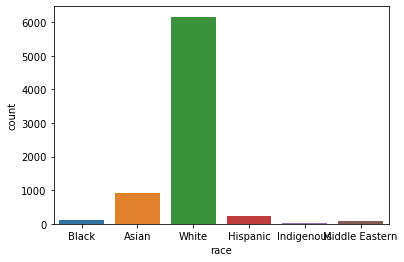

In [210]:
sns.countplot(x = 'race', data = df)

In [211]:
set(df.gender)

{'F', 'M', 'N', nan}

<AxesSubplot:xlabel='gender', ylabel='count'>

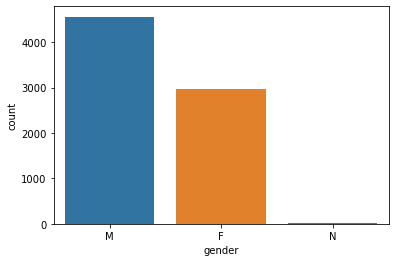

In [212]:
sns.countplot(x = 'gender', data = df)

In [214]:
df['race_plus_gender'] = df['race'] + df['gender']

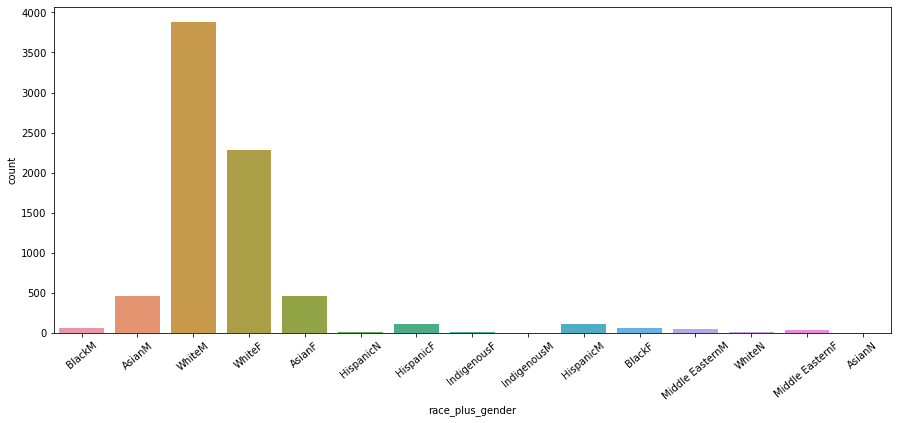

In [215]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x = 'race_plus_gender', data = df)
# plt.xticks(rotation=45)
ax.tick_params(axis='x', rotation=40)

In [216]:
df.shape

(7536, 10)

## Checking affiliation

In [111]:
aff_df = pd.read_csv('aff_df.csv')
aff_df = aff_df[['authorID', 'new_country_code', 'new_afftype']]
aff_df

,authorID,new_country_code,new_afftype
0,10.1093/jcmc/zmab019+4.0,AT,Education
1,10.1093/jcmc/zmab019+5.0,AT,Education
2,10.1093/joc/jqab052+5.0,US,Education
3,10.1093/ccc/tcac007+1.0,CN,Education
4,10.1093/joc/jqac012+4.0,US,Education
...,...,...,...
4429,10.1111/j.1083-6101.2010.01508.x+7.0,US,Education
4430,10.1111/j.1753-9137.2010.01073.x+2.0,MX,Education
4431,10.1111/j.1083-6101.2010.01532.x+1.0,US,Education
4432,10.1111/j.1753-9137.2010.01079.x+1.0,US,Education


In [114]:
pd.merge(aff_df, df, on = 'authorID')

,authorID,new_country_code,new_afftype,gender_prediction,race_prediction,race,race_plus_gender
0,10.1093/jcmc/zmab019+4.0,AT,Education,F,0.0,White,WhiteF
1,10.1093/jcmc/zmab019+5.0,AT,Education,F,0.0,White,WhiteF
2,10.1093/joc/jqab052+5.0,US,Education,F,2.0,Asian,AsianF
3,10.1093/ccc/tcac007+1.0,CN,Education,F,0.0,White,WhiteF
4,10.1093/joc/jqac012+4.0,US,Education,M,0.0,White,WhiteM
...,...,...,...,...,...,...,...
4429,10.1111/j.1083-6101.2010.01508.x+7.0,US,Education,F,0.0,White,WhiteF
4430,10.1111/j.1753-9137.2010.01073.x+2.0,MX,Education,M,3.0,Hispanic,HispanicM
4431,10.1111/j.1083-6101.2010.01532.x+1.0,US,Education,F,3.0,Hispanic,HispanicF
4432,10.1111/j.1753-9137.2010.01079.x+1.0,US,Education,F,2.0,Asian,AsianF


In [116]:
set(aff_df.authorID) == set(df.authorID)

True